## Install and import the necessary Python libraries


In [1]:
# Core libraries
import pandas as pd
import numpy as np
import json
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



# Explainability
import shap
import lime
from lime import lime_tabular

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn')
sns.set_palette("husl")
%matplotlib inline

## Load & Explore Metadata (prostate_metadata.json)



In [2]:
# Load metadata
with open('prostate_metadata.json', 'r') as f:
    metadata = json.load(f)

print("=== Dataset Metadata ===")
for key, value in metadata.items():
    print(f"{key}: {value}")

=== Dataset Metadata ===
@context: {'@language': 'en', '@vocab': 'https://schema.org/', 'citeAs': 'cr:citeAs', 'column': 'cr:column', 'conformsTo': 'dct:conformsTo', 'cr': 'http://mlcommons.org/croissant/', 'data': {'@id': 'cr:data', '@type': '@json'}, 'dataBiases': 'cr:dataBiases', 'dataCollection': 'cr:dataCollection', 'dataType': {'@id': 'cr:dataType', '@type': '@vocab'}, 'dct': 'http://purl.org/dc/terms/', 'extract': 'cr:extract', 'field': 'cr:field', 'fileProperty': 'cr:fileProperty', 'fileObject': 'cr:fileObject', 'fileSet': 'cr:fileSet', 'format': 'cr:format', 'includes': 'cr:includes', 'isEnumeration': 'cr:isEnumeration', 'isLiveDataset': 'cr:isLiveDataset', 'jsonPath': 'cr:jsonPath', 'key': 'cr:key', 'md5': 'cr:md5', 'parentField': 'cr:parentField', 'path': 'cr:path', 'personalSensitiveInformation': 'cr:personalSensitiveInformation', 'recordSet': 'cr:recordSet', 'references': 'cr:references', 'regex': 'cr:regex', 'repeated': 'cr:repeated', 'replace': 'cr:replace', 'sc': 'https

## Load & Inspect Data (prostate.csv)



In [3]:
# Load dataset
df = pd.read_csv('prostate.csv')
print(f"Dataset Shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

print("\nColumn Info:")
print(df.info())



Dataset Shape: (27945, 30)

First 5 rows:


,Patient_ID,Age,Family_History,Race_African_Ancestry,PSA_Level,DRE_Result,Biopsy_Result,Difficulty_Urinating,Weak_Urine_Flow,Blood_in_Urine,...,Alcohol_Consumption,Hypertension,Diabetes,Cholesterol_Level,Screening_Age,Follow_Up_Required,Prostate_Volume,Genetic_Risk_Factors,Previous_Cancer_History,Early_Detection
0,1,78,No,Yes,5.07,Normal,Benign,No,No,No,...,Moderate,No,No,Normal,45,No,46.0,No,No,Yes
1,2,68,No,Yes,10.24,Normal,Benign,Yes,No,No,...,Low,No,No,High,65,No,78.2,No,No,Yes
2,3,54,No,No,13.79,Normal,Benign,No,No,No,...,Low,No,No,Normal,61,No,21.1,No,No,Yes
3,4,82,No,No,8.03,Abnormal,Benign,No,No,No,...,Low,No,No,Normal,47,Yes,79.9,No,Yes,Yes
4,5,47,Yes,No,1.89,Normal,Malignant,Yes,Yes,No,...,Moderate,Yes,No,Normal,72,No,32.0,No,No,Yes



Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27945 entries, 0 to 27944
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               27945 non-null  int64  
 1   Age                      27945 non-null  int64  
 2   Family_History           27945 non-null  object 
 3   Race_African_Ancestry    27945 non-null  object 
 4   PSA_Level                27945 non-null  float64
 5   DRE_Result               27945 non-null  object 
 6   Biopsy_Result            27945 non-null  object 
 7   Difficulty_Urinating     27945 non-null  object 
 8   Weak_Urine_Flow          27945 non-null  object 
 9   Blood_in_Urine           27945 non-null  object 
 10  Pelvic_Pain              27945 non-null  object 
 11  Back_Pain                27945 non-null  object 
 12  Erectile_Dysfunction     27945 non-null  object 
 13  Cancer_Stage             27945 non-null  object 
 14  Treatmen

In [4]:
# Check for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Patient_ID                 0
Age                        0
Family_History             0
Race_African_Ancestry      0
PSA_Level                  0
DRE_Result                 0
Biopsy_Result              0
Difficulty_Urinating       0
Weak_Urine_Flow            0
Blood_in_Urine             0
Pelvic_Pain                0
Back_Pain                  0
Erectile_Dysfunction       0
Cancer_Stage               0
Treatment_Recommended      0
Survival_5_Years           0
Exercise_Regularly         0
Healthy_Diet               0
BMI                        0
Smoking_History            0
Alcohol_Consumption        0
Hypertension               0
Diabetes                   0
Cholesterol_Level          0
Screening_Age              0
Follow_Up_Required         0
Prostate_Volume            0
Genetic_Risk_Factors       0
Previous_Cancer_History    0
Early_Detection            0
dtype: int64


## Drop Feature "Patient ID" before proceeding

In [5]:
# Drop Patient_ID
if 'Patient_ID' in df.columns:
    df.drop('Patient_ID', axis=1, inplace=True)

print("✅ 'Patient_ID' column removed successfully.")
print("Updated dataset shape:", df.shape)


✅ 'Patient_ID' column removed successfully.
Updated dataset shape: (27945, 29)


## Exploratory Data Analysis (EDA)



Visualizing Target Variable Distribution

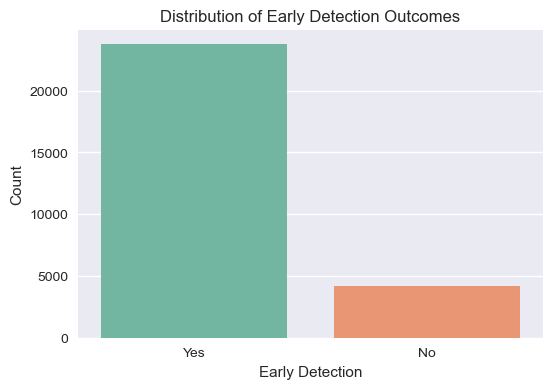

Early_Detection
Yes    84.977635
No     15.022365
Name: proportion, dtype: float64


In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='Early_Detection', data=df, palette='Set2')
plt.title('Distribution of Early Detection Outcomes')
plt.xlabel('Early Detection')
plt.ylabel('Count')
plt.show()

print(df['Early_Detection'].value_counts(normalize=True) * 100)

Numerical Feature Analysis & Distributions

,Age,PSA_Level,BMI,Screening_Age,Prostate_Volume
count,27945.000000,27945.000000,27945.000000,27945.000000,27945.000000
mean,64.459939,7.751599,26.511605,56.902308,47.755770
std,14.404755,4.175012,4.888293,10.118064,18.704286
min,40.000000,0.500000,18.000000,40.000000,15.000000
25%,52.000000,4.130000,22.300000,48.000000,31.700000
50%,64.000000,7.750000,26.500000,57.000000,47.700000
75%,77.000000,11.320000,30.700000,66.000000,63.900000
max,89.000000,15.000000,35.000000,74.000000,80.000000


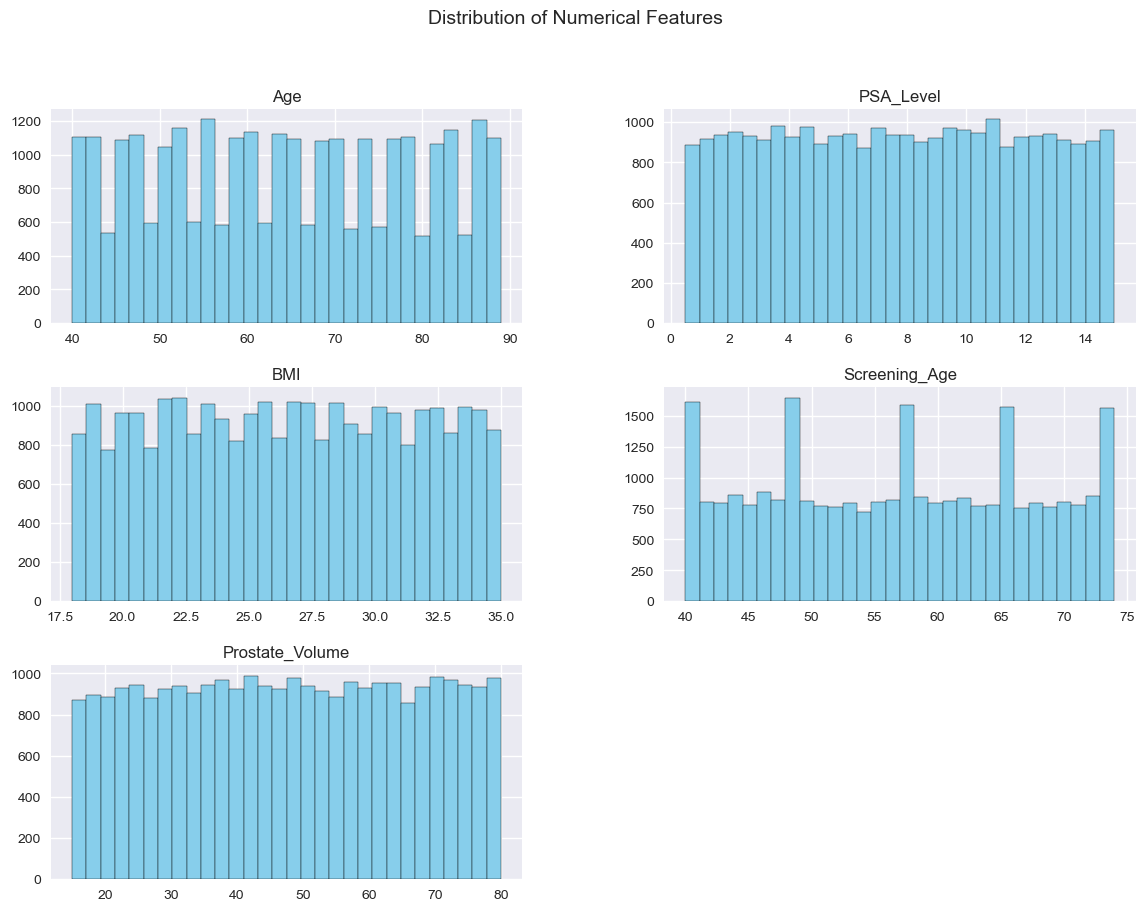

In [7]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols = [col for col in num_cols if col != 'Early_Detection']

# Summary statistics
display(df[num_cols].describe())

# Histograms
df[num_cols].hist(figsize=(14,10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=14)
plt.show()


Correlation Analysis

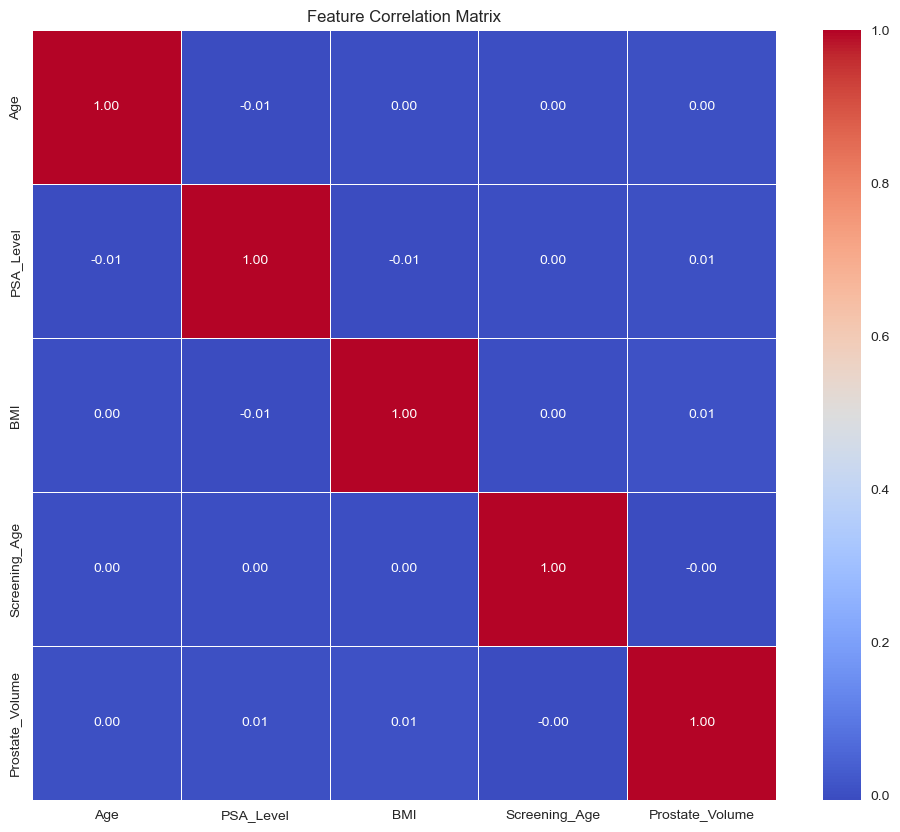

In [8]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 10))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

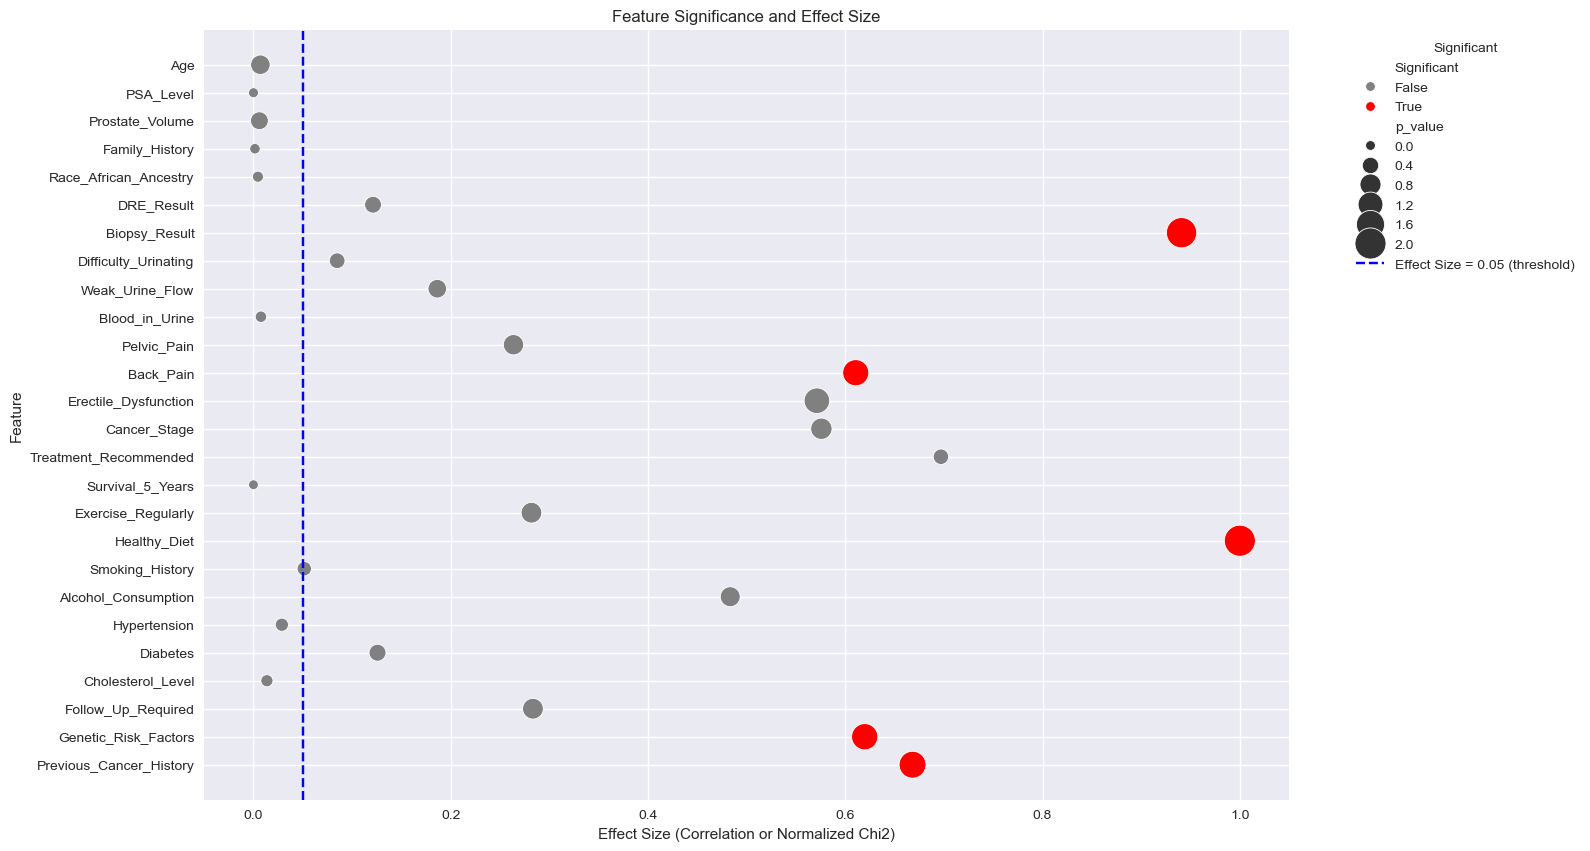

In [9]:


# Numeric features
numeric_features = ['Age', 'PSA_Level', 'Prostate_Volume']
numeric_corr = [-0.007, 0.0, -0.006]
numeric_pval = [0.223, 0.977, 0.309]

# Categorical features
cat_features = [
    'Family_History', 'Race_African_Ancestry', 'DRE_Result', 'Biopsy_Result', 
    'Difficulty_Urinating', 'Weak_Urine_Flow', 'Blood_in_Urine', 'Pelvic_Pain', 
    'Back_Pain', 'Erectile_Dysfunction', 'Cancer_Stage', 'Treatment_Recommended',
    'Survival_5_Years', 'Exercise_Regularly', 'Healthy_Diet', 'Smoking_History',
    'Alcohol_Consumption', 'Hypertension', 'Diabetes', 'Cholesterol_Level',
    'Follow_Up_Required', 'Genetic_Risk_Factors', 'Previous_Cancer_History'
]
cat_chi2 = [
    0.01, 0.03, 0.8, 6.21, 0.56, 1.23, 0.05, 1.74, 4.03, 3.77, 3.8, 4.6,
    0.0, 1.86, 6.6, 0.34, 3.19, 0.19, 0.83, 0.09, 1.87, 4.09, 4.41
]
cat_pval = [
    0.928, 0.871, 0.371, 0.013, 0.453, 0.268, 0.832, 0.188, 0.045, 0.052, 0.149, 0.467,
    1.0, 0.172, 0.010, 0.559, 0.203, 0.659, 0.363, 0.762, 0.171, 0.043, 0.036
]

# Normalize Chi2 effect size for categorical features
cat_effect = np.array(cat_chi2) / max(cat_chi2)

# Combine numeric and categorical features
effect_size = np.abs(numeric_corr).tolist() + cat_effect.tolist()
p_values = numeric_pval + cat_pval
feature_names = numeric_features + cat_features
feature_type = ['Numeric']*len(numeric_features) + ['Categorical']*len(cat_features)
significant = [p < 0.05 for p in p_values]

eda_df = pd.DataFrame({
    'Feature': feature_names,
    'p_value': p_values,
    'Effect_Size': effect_size,
    'Type': feature_type,
    'Significant': significant
})

# Plot
plt.figure(figsize=(14, 10))
sns.scatterplot(
    x='Effect_Size', 
    y='Feature', 
    size=-np.log10(eda_df['p_value']),  # smaller p-value = larger marker
    hue='Significant', 
    palette={True:'red', False:'gray'},
    sizes=(50, 500),
    data=eda_df
)
plt.axvline(0.05, color='blue', linestyle='--', label='Effect Size = 0.05 (threshold)')
plt.title('Feature Significance and Effect Size')
plt.xlabel('Effect Size (Correlation or Normalized Chi2)')
plt.ylabel('Feature')
plt.legend(title='Significant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


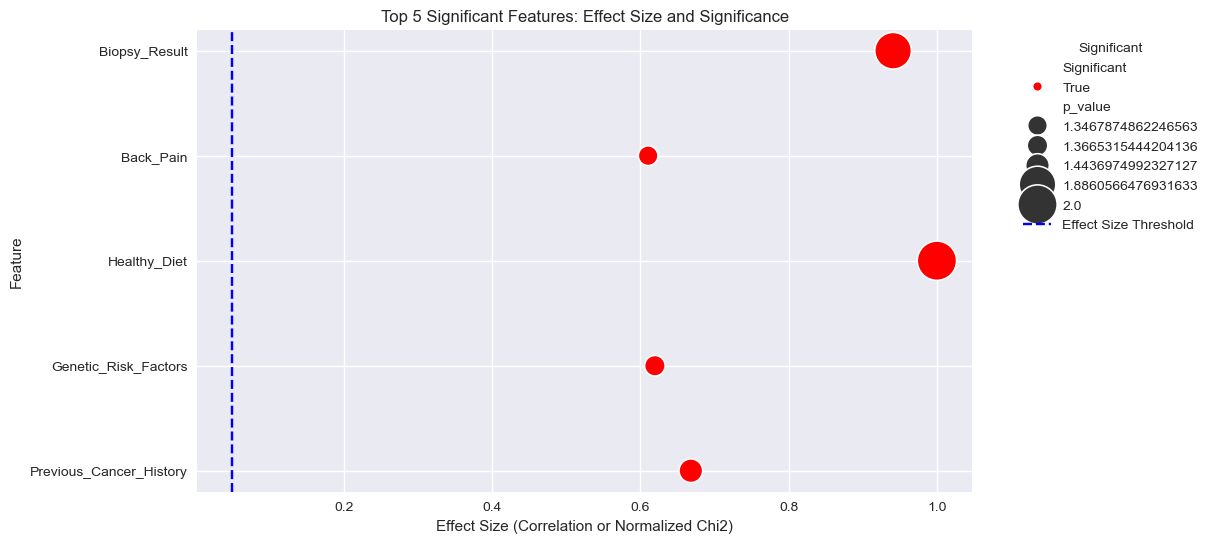

In [10]:
# Filter top 5 significant features
top_features = ['Biopsy_Result', 'Back_Pain', 'Healthy_Diet', 'Genetic_Risk_Factors', 'Previous_Cancer_History']
top_df = eda_df[eda_df['Feature'].isin(top_features)]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Effect_Size',
    y='Feature',
    size=-np.log10(top_df['p_value']),
    hue='Significant',
    palette={True:'red', False:'gray'},
    sizes=(200, 800),
    data=top_df
)
plt.axvline(0.05, color='blue', linestyle='--', label='Effect Size Threshold')
plt.title('Top 5 Significant Features: Effect Size and Significance')
plt.xlabel('Effect Size (Correlation or Normalized Chi2)')
plt.ylabel('Feature')
plt.legend(title='Significant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


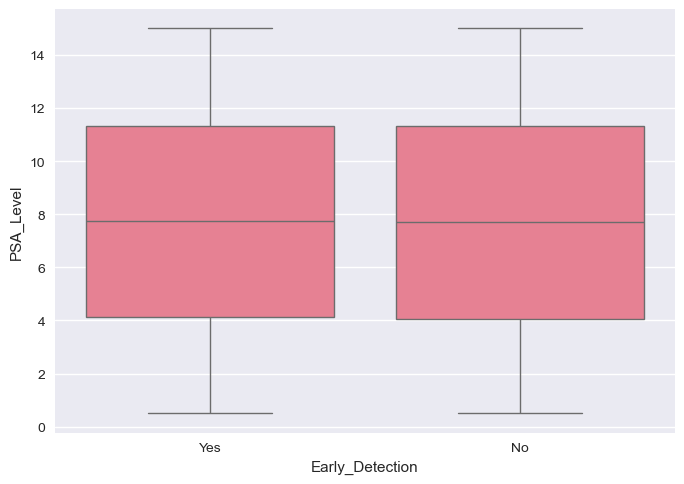

In [11]:
sns.boxplot(x='Early_Detection', y='PSA_Level', data=df)
plt.show()


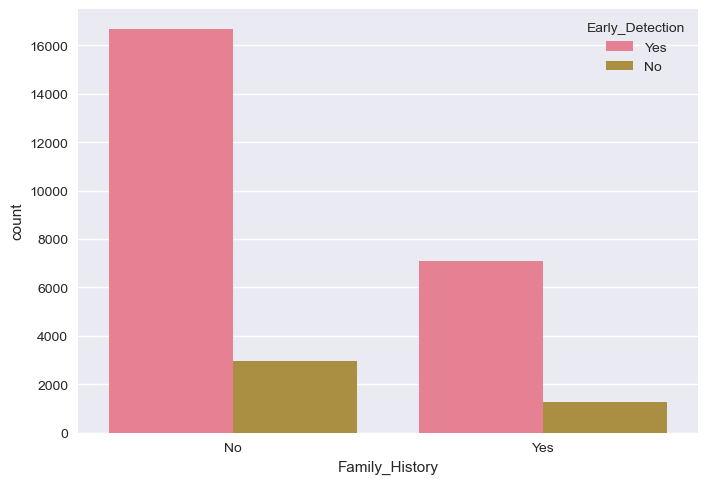

In [12]:
sns.countplot(x='Family_History', hue='Early_Detection', data=df)
plt.show()


Outlier Detection (Boxplots)

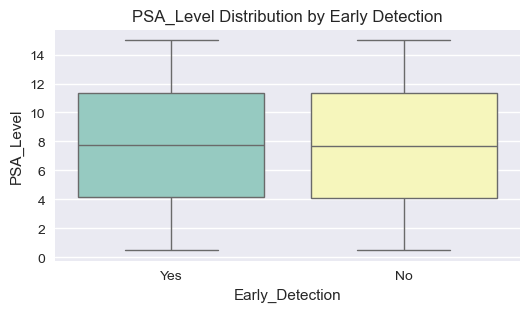

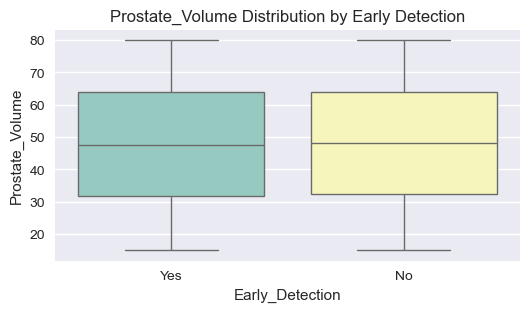

In [13]:
for col in ['PSA_Level', 'Prostate_Volume']:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='Early_Detection', y=col, data=df, palette='Set3')
    plt.title(f'{col} Distribution by Early Detection')
    plt.show()


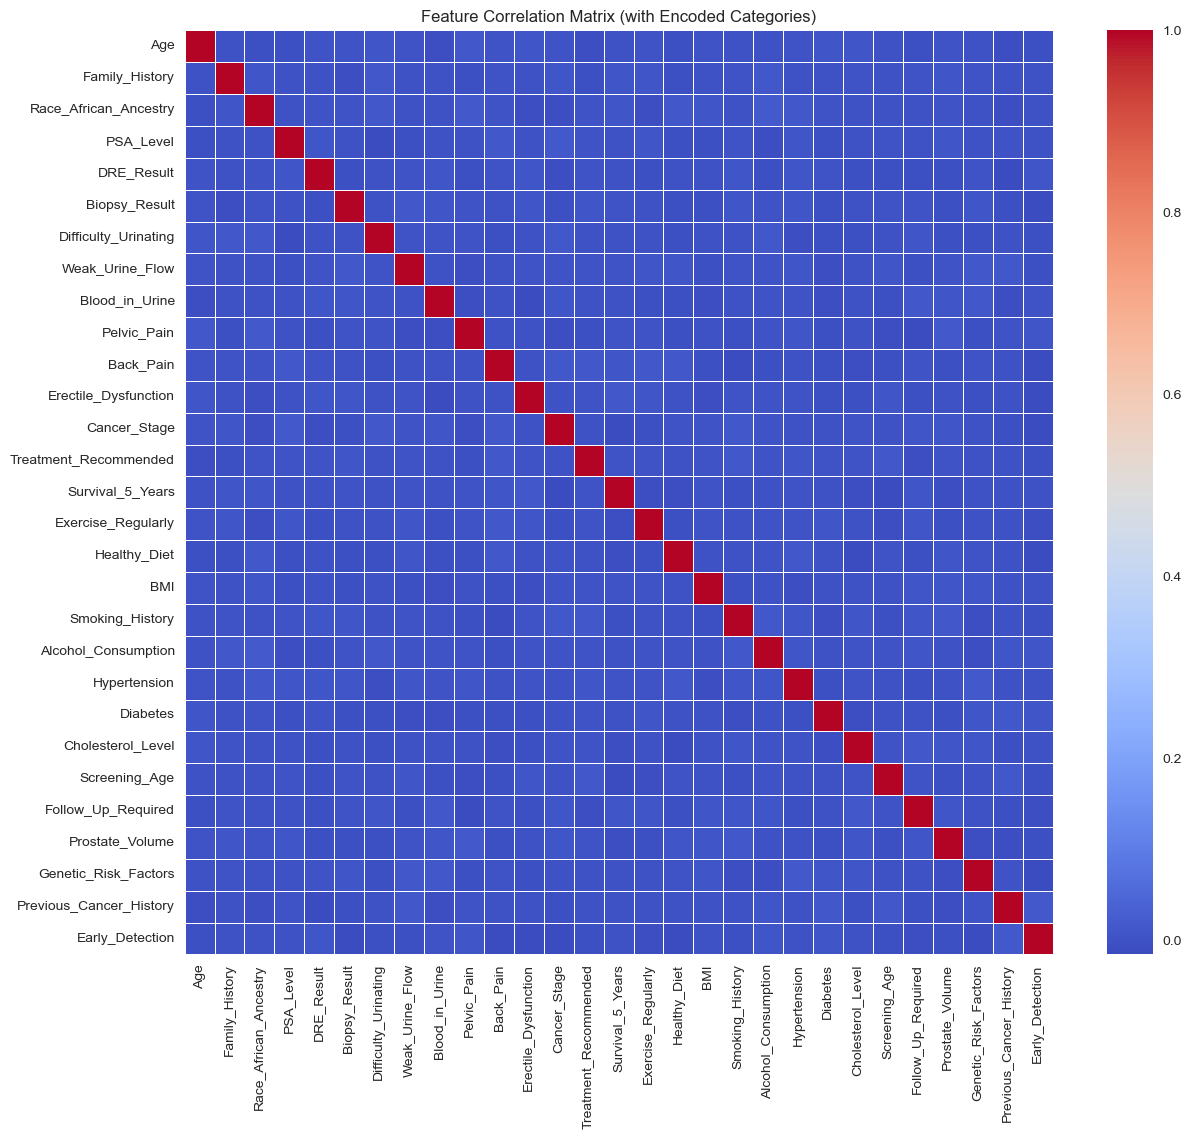

In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns temporarily for correlation
encoded_df = df.copy()
for col in encoded_df.select_dtypes(include=['object']).columns:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col])

plt.figure(figsize=(14, 12))
corr = encoded_df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix (with Encoded Categories)')
plt.show()


## Feature Importance Using Decision Tree

Feature Importances:
PSA_Level                  0.130598
Prostate_Volume            0.126284
BMI                        0.119376
Age                        0.103294
Screening_Age              0.097876
Treatment_Recommended      0.052766
Alcohol_Consumption        0.028413
Cancer_Stage               0.025380
Follow_Up_Required         0.020410
Exercise_Regularly         0.019484
Hypertension               0.019080
Weak_Urine_Flow            0.018325
Family_History             0.017977
Cholesterol_Level          0.017711
Smoking_History            0.017347
Healthy_Diet               0.016862
Erectile_Dysfunction       0.016511
Difficulty_Urinating       0.016322
Biopsy_Result              0.015943
Race_African_Ancestry      0.015798
Genetic_Risk_Factors       0.015650
Pelvic_Pain                0.015615
Diabetes                   0.015182
DRE_Result                 0.013280
Back_Pain                  0.013062
Blood_in_Urine             0.010896
Survival_5_Years           0.010686
Previou

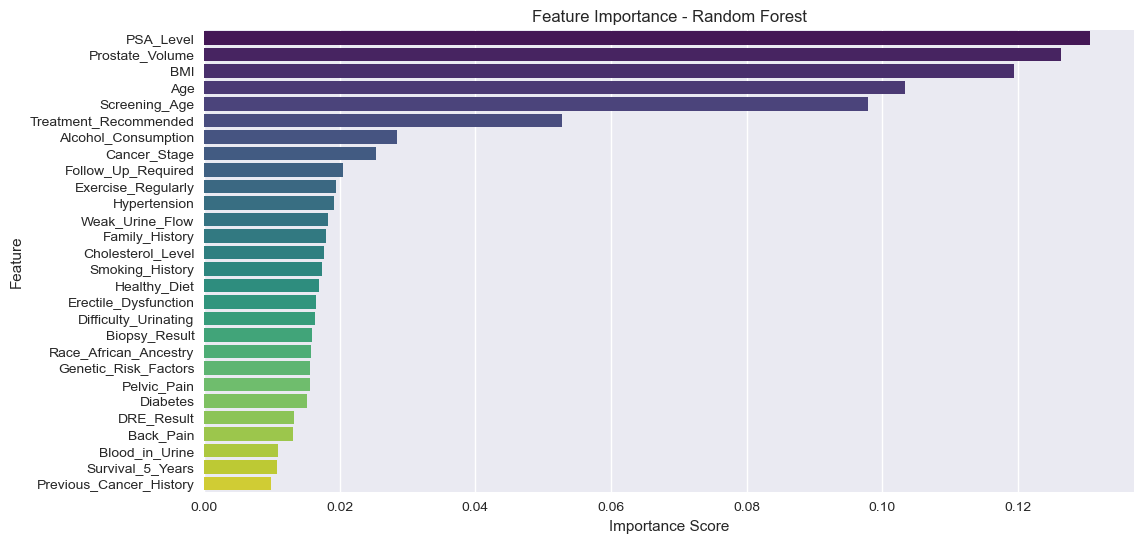

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming your dataset is loaded in df
# Encode categorical variables
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    if col != 'Early_Detection':  # target remains unchanged
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Encode target
df_encoded['Early_Detection'] = LabelEncoder().fit_transform(df_encoded['Early_Detection'])

# Separate features and target
X = df_encoded.drop(columns=['Early_Detection'])
y = df_encoded['Early_Detection']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Feature Importances:")
print(importances)

# Optional: Visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=importances.values, y=importances.index, palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


## Check for Data Imbalance

In [16]:
df['Early_Detection'].value_counts(normalize=True)


Early_Detection
Yes    0.849776
No     0.150224
Name: proportion, dtype: float64

In [59]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Balanced class distribution:")
print(pd.Series(y_res).value_counts())


Balanced class distribution:
Early_Detection
1    23747
0    23747
Name: count, dtype: int64


In [60]:
# Top 5 features from Random Forest
top_features = ['PSA_Level', 'Prostate_Volume', 'BMI', 'Age', 'Screening_Age']

# 5 previously selected features
previous_features = ['Biopsy_Result', 'Back_Pain', 'Healthy_Diet', 'Genetic_Risk_Factors', 'Previous_Cancer_History']

# Combine them
selected_features = top_features + previous_features
print("Selected Features for Modeling:", selected_features)

# Include the target column
target = 'Early_Detection'  # or 'Early_Detection_Binary' if you encoded it already

# Subset the dataframe
df_model = df[selected_features + [target]]

# Encode categorical features if needed
from sklearn.preprocessing import LabelEncoder

categorical_features = df_model.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features = [col for col in categorical_features if col != target]  # exclude target

le_dict = {}
for col in categorical_features:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le  # store encoder for inverse transform if needed

# Encode target if needed
if df_model[target].dtype == 'object':
    le_target = LabelEncoder()
    df_model[target] = le_target.fit_transform(df_model[target])

# Split into features and target
X = df_model.drop(target, axis=1)
y = df_model[target]

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Selected Features for Modeling: ['PSA_Level', 'Prostate_Volume', 'BMI', 'Age', 'Screening_Age', 'Biopsy_Result', 'Back_Pain', 'Healthy_Diet', 'Genetic_Risk_Factors', 'Previous_Cancer_History']
Training set shape: (22356, 10)
Testing set shape: (5589, 10)


## Train-Test Split

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)


## Logistic Regression Training

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.76      0.70      4750
           1       0.71      0.59      0.64      4749

    accuracy                           0.67      9499
   macro avg       0.68      0.67      0.67      9499
weighted avg       0.68      0.67      0.67      9499

ROC AUC Score: 0.715
Confusion Matrix:
[[3589 1161]
 [1959 2790]]
ROC AUC Score: 0.715


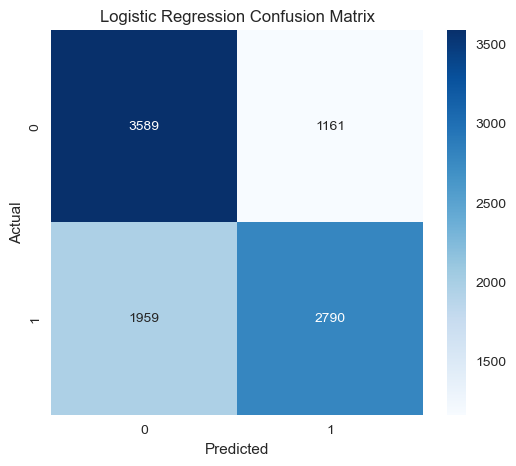

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score

# Initialize and train logistic regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]  # probability for ROC

# Evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# ROC AUC
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
print(f"ROC AUC Score: {roc_auc_lr:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(cm)

# ROC AUC
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
print(f"ROC AUC Score: {roc_auc_lr:.3f}")

# 5️⃣ Visualize confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


## RandomForest Training

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      4750
           1       0.83      0.78      0.80      4749

    accuracy                           0.81      9499
   macro avg       0.81      0.81      0.81      9499
weighted avg       0.81      0.81      0.81      9499

ROC AUC Score: 0.889
Confusion Matrix:
[[3994  756]
 [1051 3698]]
ROC AUC Score: 0.889


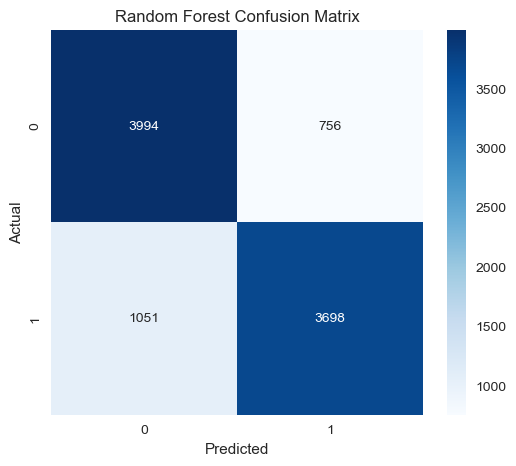

In [76]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# ROC AUC
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"ROC AUC Score: {roc_auc_rf:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm)

# ROC AUC
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"ROC AUC Score: {roc_auc_rf:.3f}")

# 5️⃣ Visualize confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()



## SVM Training

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.80      0.68      4750
           1       0.70      0.47      0.56      4749

    accuracy                           0.63      9499
   macro avg       0.65      0.63      0.62      9499
weighted avg       0.65      0.63      0.62      9499

ROC AUC Score: 0.694
Confusion Matrix:
[[3779  971]
 [2511 2238]]
ROC AUC Score: 0.694


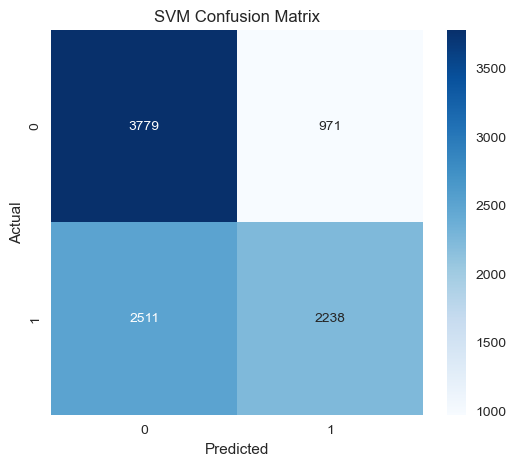

In [66]:
from sklearn.svm import SVC

# Initialize and train SVM with probability=True for ROC
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]

# Evaluation
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# ROC AUC
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)
print(f"ROC AUC Score: {roc_auc_svm:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(cm)

# ROC AUC
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)
print(f"ROC AUC Score: {roc_auc_svm:.3f}")

# Visualize confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()


## Models ROC Curve Comparison

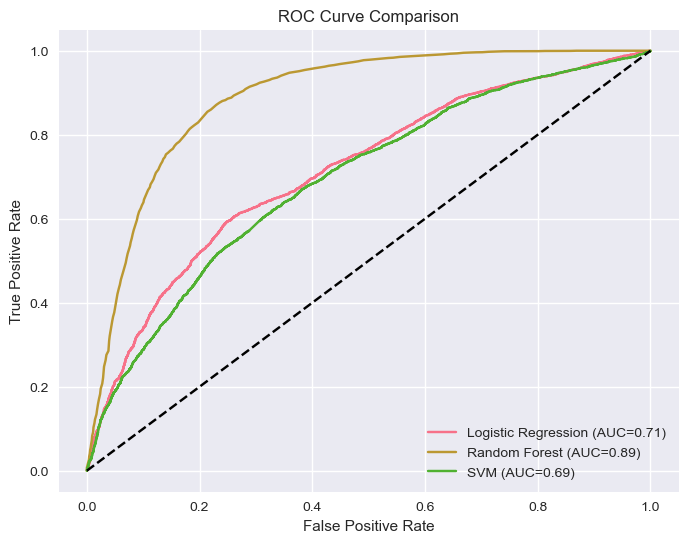

In [67]:
import matplotlib.pyplot as plt

# Compute ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC={roc_auc_svm:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


## Model Accuracy Comparison

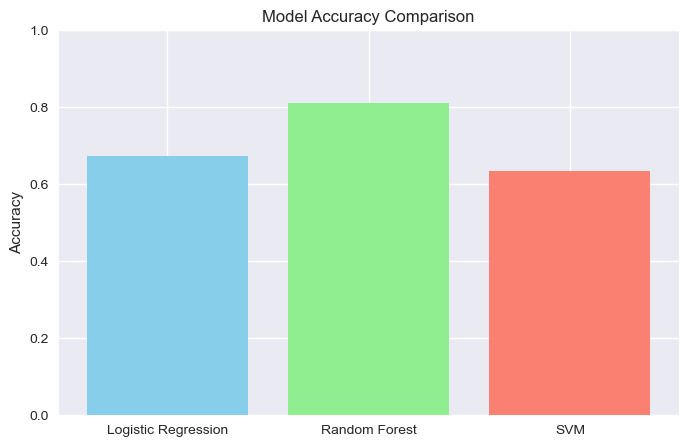

In [68]:
# Accuracy scores
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_svm = accuracy_score(y_test, y_pred_svm)

models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracy = [acc_lr, acc_rf, acc_svm]

plt.figure(figsize=(8,5))
plt.bar(models, accuracy, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()
